In [2]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
help(d2l.use_svg_display)

Help on function use_svg_display in module d2l.torch:

use_svg_display()
    Use the svg format to display a plot in Jupyter.
    
    Defined in :numref:`sec_calculus`



In [4]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data/",
    train=True,
    transform=trans,
    download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data/",
    train=False,
    transform=trans,
    download=True)            
len(mnist_train), len(mnist_test) # 训练数据集长度, 测试数据集长度

(60000, 10000)

In [ ]:
mnist_train[0][0].shape # 图片形状(channels, height, weight)
# 由于是黑白图片，channels = 1

torch.Size([1, 28, 28])

### 两个用于可视化数据集的函数

In [6]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt','trouser','pullover','dress','coat',
                   'sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale) # 传进来的图像尺寸，scale 为放缩比例因子
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    print(_)
    print(axes) # axes 为构建的两行九列的画布
    axes = axes.flatten()
    print(axes) # axes 变成一维数据
    for i,(ax,img) in enumerate(zip(axes,imgs)):
        if(i<1):
            print("i:",i)
            print("ax,img:",ax,img)
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
            ax.set_title(titles[i])
        else:
            # PIL图片
            ax.imshow(img)

Figure(1350x300)
[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
  <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
  <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >
 <Axes: > <Axes: >]
i: 0
ax,img: Axes(0.125,0.53;0.0731132x0.35) tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.00

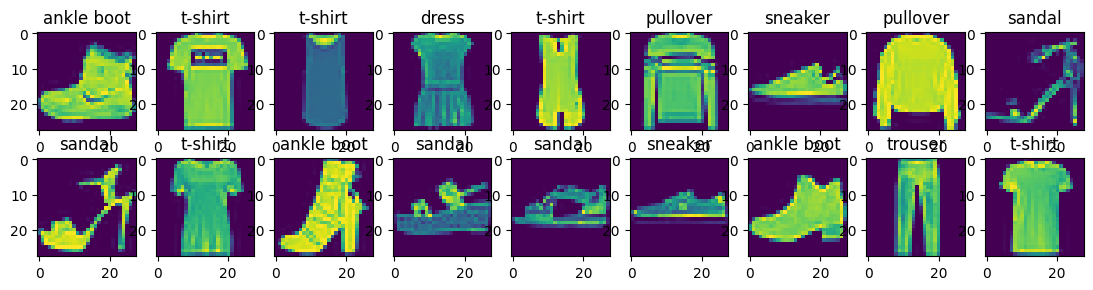

In [ ]:
# mnist_train为pytorch格式的数据集
# 对其调用DataLoader并指定一个batch_size就可以拿到分批的数据
# iter构造一个iterator (当一个对象是可迭代的（即它可以被循环遍历，比如列表、元组、字符串、字典等），你可以使用 iter() 来获取它的迭代器。这个迭代器会记住遍历的位置，每次请求下一个元素时就返回下一个)
# next取第一个批量
X, y = next(iter(data.DataLoader(mnist_train,batch_size=18))) 
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

In [16]:
batch_size = 256
def get_dataloader_workers():
    return 4

# 新建一个迭代器对象
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers())

timer = d2l.Timer() # 计时器对象实例化，开始计时
for X,y in train_iter:  # 遍历一个batch_size数据的时间
    continue
f'{timer.stop():.2f}sec' # 计时器停止时，停止与开始的时间间隔事件

'5.38sec'

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize)) # 如果有Resize参数传进来，就进行resize操作
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data/",train=True,transform=trans,download=True)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data/",train=False,transform=trans,download=True)            
    return (data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=get_dataloader_workers()),
           data.DataLoader(mnist_test, batch_size, shuffle=True, num_workers=get_dataloader_workers()))               